# This script reads Ecmwf daily precip realtime forecast with wkly init (1 member)

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

    
# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(r"C:/rezaul/academic/research/project/S2S/biasFnBigProc/prcp/conus/output/fig/python/ecmwfCpc/")

outputPath = os.path.join("C:/rezaul/academic/research/project/S2S/biasFnBigProc/prcp/conus/output/python/ecmwfCpc/")
PATH = os.path.join(outputPath)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

# Common imports

In [2]:
import numpy as np
import numpy.ma as ma     # used for Masking

import pandas as pd
import os
import glob
from datetime import datetime
from osgeo import gdal 
#import gdal

import cmocean

import matplotlib.pyplot as plt 
from numpy import linspace 
from numpy import meshgrid 

import scipy.io as sio
import calendar
import datetime
import matplotlib.dates as mdates
from numpy import array, ma
from scipy.io import loadmat  

from netCDF4 import Dataset  
import xarray as xr


In [3]:
import matplotlib.colors as colors
from copy import copy
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
#cartopy.feature.STATES.with_scale('10m')
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

In [5]:
#import rasterio
import pygrib

In [6]:
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid

In [7]:
import math

In [8]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.colors import BoundaryNorm

In [9]:
weekNumberList = []
for yr in range(3):    
    weekNumberList.append(52)    
weekNumber = np.array(weekNumberList)
weekNumber[0] = 53     
print(weekNumber.shape)
print(weekNumber)


(3,)
[53 52 52]


In [10]:

weeksTot = 0
for yr in range(3):      
    weeksTot = weeksTot + weekNumber[yr]
    
print(weeksTot)

weeksTot = 3

print(weeksTot)


157
3


## Prepare a CPC daily precipitation sample file to condition the ECMWF data in 2018

In [11]:
yrSample = 2018
yrSampleStr = str(yrSample)
print(yrSampleStr)

monSt = 8
monEnd = 8

daySt = 218    # = from May 7, 2018 to May 21, 2018 init
dayEnd = 238   # = from May 7, 2018 to May 21, 2018 init
daysTrgt = weeksTot*7

print(daysTrgt)

2018
21


In [12]:
# Loading data downloaded and stored in a local disk
ncFileCpc = r'C:/rezaul/1.academic/1.research/1.data/CPC/precip/precip.' + str(yrSampleStr) + '.nc'
ncFileCpc

'C:/rezaul/1.academic/1.research/1.data/CPC/precip/precip.2018.nc'

In [13]:
nc_fid_Cpc = Dataset(ncFileCpc, 'r')
nc_fid_Cpc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.0
    Source: ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    version: V1.0
    title: CPC GLOBAL PRCP V1.0 RT
    dataset_title: CPC GLOBAL PRCP V1.0
    dataset: CPC Global Precipitation
    history: Updated 2019-01-28 17:33:20
    References: https://www.psl.noaa.gov/data/gridded/data.cpc.globalprecip.html
    dimensions(sizes): lat(360), lon(720), time(365)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 precip(time, lat, lon)
    groups: 

In [14]:
ds_Cpc = xr.open_dataset(ncFileCpc)
ds_Cpc

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 365)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-12-31
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.0
    Source:         ftp://ftp.cpc.ncep.noaa.gov/precip/CPC_UNI_PRCP/
    version:        V1.0
    title:          CPC GLOBAL PRCP V1.0 RT
    dataset_title:  CPC GLOBAL PRCP V1.0
    dataset:        CPC Global Precipitation
    history:        Updated 2019-01-28 17:33:20
    References:     https://www.psl.noaa.gov/data/gridded/data.cpc.globalprec...

In [15]:
latsCpc = nc_fid_Cpc.variables['lat'][:]
lonsCpc = nc_fid_Cpc.variables['lon'][:]

print(latsCpc.shape)
print(lonsCpc.shape)

precipCpcGl = nc_fid_Cpc.variables['precip'][:]
print(precipCpcGl.shape)

(360,)
(720,)
(365, 360, 720)


In [16]:
print(latsCpc)

[ 89.75  89.25  88.75  88.25  87.75  87.25  86.75  86.25  85.75  85.25
  84.75  84.25  83.75  83.25  82.75  82.25  81.75  81.25  80.75  80.25
  79.75  79.25  78.75  78.25  77.75  77.25  76.75  76.25  75.75  75.25
  74.75  74.25  73.75  73.25  72.75  72.25  71.75  71.25  70.75  70.25
  69.75  69.25  68.75  68.25  67.75  67.25  66.75  66.25  65.75  65.25
  64.75  64.25  63.75  63.25  62.75  62.25  61.75  61.25  60.75  60.25
  59.75  59.25  58.75  58.25  57.75  57.25  56.75  56.25  55.75  55.25
  54.75  54.25  53.75  53.25  52.75  52.25  51.75  51.25  50.75  50.25
  49.75  49.25  48.75  48.25  47.75  47.25  46.75  46.25  45.75  45.25
  44.75  44.25  43.75  43.25  42.75  42.25  41.75  41.25  40.75  40.25
  39.75  39.25  38.75  38.25  37.75  37.25  36.75  36.25  35.75  35.25
  34.75  34.25  33.75  33.25  32.75  32.25  31.75  31.25  30.75  30.25
  29.75  29.25  28.75  28.25  27.75  27.25  26.75  26.25  25.75  25.25
  24.75  24.25  23.75  23.25  22.75  22.25  21.75  21.25  20.75  20.25
  19.7

In [17]:
print(lonsCpc)

[2.5000e-01 7.5000e-01 1.2500e+00 1.7500e+00 2.2500e+00 2.7500e+00
 3.2500e+00 3.7500e+00 4.2500e+00 4.7500e+00 5.2500e+00 5.7500e+00
 6.2500e+00 6.7500e+00 7.2500e+00 7.7500e+00 8.2500e+00 8.7500e+00
 9.2500e+00 9.7500e+00 1.0250e+01 1.0750e+01 1.1250e+01 1.1750e+01
 1.2250e+01 1.2750e+01 1.3250e+01 1.3750e+01 1.4250e+01 1.4750e+01
 1.5250e+01 1.5750e+01 1.6250e+01 1.6750e+01 1.7250e+01 1.7750e+01
 1.8250e+01 1.8750e+01 1.9250e+01 1.9750e+01 2.0250e+01 2.0750e+01
 2.1250e+01 2.1750e+01 2.2250e+01 2.2750e+01 2.3250e+01 2.3750e+01
 2.4250e+01 2.4750e+01 2.5250e+01 2.5750e+01 2.6250e+01 2.6750e+01
 2.7250e+01 2.7750e+01 2.8250e+01 2.8750e+01 2.9250e+01 2.9750e+01
 3.0250e+01 3.0750e+01 3.1250e+01 3.1750e+01 3.2250e+01 3.2750e+01
 3.3250e+01 3.3750e+01 3.4250e+01 3.4750e+01 3.5250e+01 3.5750e+01
 3.6250e+01 3.6750e+01 3.7250e+01 3.7750e+01 3.8250e+01 3.8750e+01
 3.9250e+01 3.9750e+01 4.0250e+01 4.0750e+01 4.1250e+01 4.1750e+01
 4.2250e+01 4.2750e+01 4.3250e+01 4.3750e+01 4.4250e+01 4.4750

## Subsetting CPC precip for the CONUS area

In [18]:
iiCpcSt = 70      # = 55 degree
iiCpcEnd = 141    # = 20 degree

jjCpcSt = 460   # = 229.75 deg = 130.25 deg W
jjCpcEnd = 601


In [19]:
print(latsCpc[iiCpcSt-1:iiCpcEnd])

[55.25 54.75 54.25 53.75 53.25 52.75 52.25 51.75 51.25 50.75 50.25 49.75
 49.25 48.75 48.25 47.75 47.25 46.75 46.25 45.75 45.25 44.75 44.25 43.75
 43.25 42.75 42.25 41.75 41.25 40.75 40.25 39.75 39.25 38.75 38.25 37.75
 37.25 36.75 36.25 35.75 35.25 34.75 34.25 33.75 33.25 32.75 32.25 31.75
 31.25 30.75 30.25 29.75 29.25 28.75 28.25 27.75 27.25 26.75 26.25 25.75
 25.25 24.75 24.25 23.75 23.25 22.75 22.25 21.75 21.25 20.75 20.25 19.75]


In [20]:
latsConus = latsCpc[iiCpcSt-1:iiCpcEnd]
print(latsConus.shape)
print(latsConus)

(72,)
[55.25 54.75 54.25 53.75 53.25 52.75 52.25 51.75 51.25 50.75 50.25 49.75
 49.25 48.75 48.25 47.75 47.25 46.75 46.25 45.75 45.25 44.75 44.25 43.75
 43.25 42.75 42.25 41.75 41.25 40.75 40.25 39.75 39.25 38.75 38.25 37.75
 37.25 36.75 36.25 35.75 35.25 34.75 34.25 33.75 33.25 32.75 32.25 31.75
 31.25 30.75 30.25 29.75 29.25 28.75 28.25 27.75 27.25 26.75 26.25 25.75
 25.25 24.75 24.25 23.75 23.25 22.75 22.25 21.75 21.25 20.75 20.25 19.75]


In [21]:
print(lonsCpc[jjCpcSt-1:jjCpcEnd])

[229.75 230.25 230.75 231.25 231.75 232.25 232.75 233.25 233.75 234.25
 234.75 235.25 235.75 236.25 236.75 237.25 237.75 238.25 238.75 239.25
 239.75 240.25 240.75 241.25 241.75 242.25 242.75 243.25 243.75 244.25
 244.75 245.25 245.75 246.25 246.75 247.25 247.75 248.25 248.75 249.25
 249.75 250.25 250.75 251.25 251.75 252.25 252.75 253.25 253.75 254.25
 254.75 255.25 255.75 256.25 256.75 257.25 257.75 258.25 258.75 259.25
 259.75 260.25 260.75 261.25 261.75 262.25 262.75 263.25 263.75 264.25
 264.75 265.25 265.75 266.25 266.75 267.25 267.75 268.25 268.75 269.25
 269.75 270.25 270.75 271.25 271.75 272.25 272.75 273.25 273.75 274.25
 274.75 275.25 275.75 276.25 276.75 277.25 277.75 278.25 278.75 279.25
 279.75 280.25 280.75 281.25 281.75 282.25 282.75 283.25 283.75 284.25
 284.75 285.25 285.75 286.25 286.75 287.25 287.75 288.25 288.75 289.25
 289.75 290.25 290.75 291.25 291.75 292.25 292.75 293.25 293.75 294.25
 294.75 295.25 295.75 296.25 296.75 297.25 297.75 298.25 298.75 299.25
 299.7

In [22]:
lonsConus = lonsCpc[jjCpcSt-1:jjCpcEnd]
print(lonsConus.shape)
print(lonsConus)

(142,)
[229.75 230.25 230.75 231.25 231.75 232.25 232.75 233.25 233.75 234.25
 234.75 235.25 235.75 236.25 236.75 237.25 237.75 238.25 238.75 239.25
 239.75 240.25 240.75 241.25 241.75 242.25 242.75 243.25 243.75 244.25
 244.75 245.25 245.75 246.25 246.75 247.25 247.75 248.25 248.75 249.25
 249.75 250.25 250.75 251.25 251.75 252.25 252.75 253.25 253.75 254.25
 254.75 255.25 255.75 256.25 256.75 257.25 257.75 258.25 258.75 259.25
 259.75 260.25 260.75 261.25 261.75 262.25 262.75 263.25 263.75 264.25
 264.75 265.25 265.75 266.25 266.75 267.25 267.75 268.25 268.75 269.25
 269.75 270.25 270.75 271.25 271.75 272.25 272.75 273.25 273.75 274.25
 274.75 275.25 275.75 276.25 276.75 277.25 277.75 278.25 278.75 279.25
 279.75 280.25 280.75 281.25 281.75 282.25 282.75 283.25 283.75 284.25
 284.75 285.25 285.75 286.25 286.75 287.25 287.75 288.25 288.75 289.25
 289.75 290.25 290.75 291.25 291.75 292.25 292.75 293.25 293.75 294.25
 294.75 295.25 295.75 296.25 296.75 297.25 297.75 298.25 298.75 299.25

In [23]:
lonsConusChk1 = lonsCpc[472-1:571]
print(lonsConusChk1.shape)
print(lonsConusChk1)

(100,)
[235.75 236.25 236.75 237.25 237.75 238.25 238.75 239.25 239.75 240.25
 240.75 241.25 241.75 242.25 242.75 243.25 243.75 244.25 244.75 245.25
 245.75 246.25 246.75 247.25 247.75 248.25 248.75 249.25 249.75 250.25
 250.75 251.25 251.75 252.25 252.75 253.25 253.75 254.25 254.75 255.25
 255.75 256.25 256.75 257.25 257.75 258.25 258.75 259.25 259.75 260.25
 260.75 261.25 261.75 262.25 262.75 263.25 263.75 264.25 264.75 265.25
 265.75 266.25 266.75 267.25 267.75 268.25 268.75 269.25 269.75 270.25
 270.75 271.25 271.75 272.25 272.75 273.25 273.75 274.25 274.75 275.25
 275.75 276.25 276.75 277.25 277.75 278.25 278.75 279.25 279.75 280.25
 280.75 281.25 281.75 282.25 282.75 283.25 283.75 284.25 284.75 285.25]


In [24]:
bufferCellSt = 13
bufferCellEnd = 112

In [25]:
lonsConusBuffer = lonsConus[bufferCellSt-1:bufferCellEnd]
print(lonsConusBuffer.shape)
print(lonsConusBuffer)

(100,)
[235.75 236.25 236.75 237.25 237.75 238.25 238.75 239.25 239.75 240.25
 240.75 241.25 241.75 242.25 242.75 243.25 243.75 244.25 244.75 245.25
 245.75 246.25 246.75 247.25 247.75 248.25 248.75 249.25 249.75 250.25
 250.75 251.25 251.75 252.25 252.75 253.25 253.75 254.25 254.75 255.25
 255.75 256.25 256.75 257.25 257.75 258.25 258.75 259.25 259.75 260.25
 260.75 261.25 261.75 262.25 262.75 263.25 263.75 264.25 264.75 265.25
 265.75 266.25 266.75 267.25 267.75 268.25 268.75 269.25 269.75 270.25
 270.75 271.25 271.75 272.25 272.75 273.25 273.75 274.25 274.75 275.25
 275.75 276.25 276.75 277.25 277.75 278.25 278.75 279.25 279.75 280.25
 280.75 281.25 281.75 282.25 282.75 283.25 283.75 284.25 284.75 285.25]


In [26]:

precipCpcConusDays = precipCpcGl[daySt-1:dayEnd,iiCpcSt-1:iiCpcEnd,jjCpcSt-1:jjCpcEnd]
print(precipCpcConusDays.shape)

(21, 72, 142)


In [27]:

t,y,x = precipCpcConusDays.shape

print(y)
print(x)
print(t)


72
142
21


In [28]:
timeStepArbitrary = 9
precipCpcConusRepr = precipCpcConusDays[timeStepArbitrary,:,:]    # as a representative extent of the field
print(precipCpcConusRepr.shape)
print(precipCpcConusRepr)

(72, 142)
[[3.60858416557312 1.7175287008285522 0.41484758257865906 ...
  0.7112919688224792 0.16330674290657043 0.2587921917438507]
 [0.8838971257209778 0.313178151845932 0.0 ... 1.139244794845581
  1.0623468160629272 1.442520022392273]
 [0.0 0.0 0.0 ... 2.649423360824585 2.875415802001953 3.7296483516693115]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


## Modifying the CPC file so that the missing data will be nan values

In [29]:
print(precipCpcConusRepr.shape)

(72, 142)


In [30]:
nanCountPrecipCpcConusRepr = np.count_nonzero(np.isnan(precipCpcConusRepr))
print(nanCountPrecipCpcConusRepr)

0


In [31]:
precipCpcConusReprToNan = np.where(precipCpcConusRepr<0, np.nan, precipCpcConusRepr)
print(precipCpcConusReprToNan.shape)

(72, 142)


In [32]:
nanCountPrecipCpcConusReprToNan = np.count_nonzero(np.isnan(precipCpcConusReprToNan))
print(nanCountPrecipCpcConusReprToNan)

3794


## Fetch CPC data in a loop for three weeks in 2018

In [33]:
yrSt = 2018
yrEnd = 2018

monSt = 8
monEnd = 8

daySt = 218    # = from May 7, 2018 to May 21, 2018 init
dayEnd = 238   # = from May 7, 2018 to May 21, 2018 init
daysTrgt = weeksTot*7
print(daysTrgt)
yrStStr = str(yrSt)
print(yrStStr)
yrEndStr = str(yrEnd)
print(yrEndStr)

21
2018
2018


In [34]:
# Targetting 30~40 deg lat
latConusLowerSt = 31
latConusLowerEnd = 51

latsConusLower = latsConus[latConusLowerSt-1:latConusLowerEnd]

print(latsConusLower)

[40.25 39.75 39.25 38.75 38.25 37.75 37.25 36.75 36.25 35.75 35.25 34.75
 34.25 33.75 33.25 32.75 32.25 31.75 31.25 30.75 30.25]


In [35]:

yrCounter = 0
for yr in range(yrSt,yrEnd+1):
    
    yrCounter = yrCounter + 1
    
    yrStr = str(yr)                        # = 2018
    daysPerYr = 366 if calendar.isleap(yr) else 365
    
    filePathCpc = os.path.join("C:/rezaul/1.academic/1.research/1.data/CPC/precip")
    fileNameCpc = 'precip.' +yrStr + '.nc'
    ncFileCpc = str(filePathCpc)+ '/'+ str(fileNameCpc)
    
    nc_fid_Cpc = Dataset(ncFileCpc, 'r')
    prcpCpcGl = nc_fid_Cpc.variables['precip'][:]   # = (365 x 360 x 720)    
    
    prcpCpcConus = prcpCpcGl[daySt-1:dayEnd,iiCpcSt-1:iiCpcEnd,jjCpcSt-1:jjCpcEnd]
    prcpCpcConusLower = prcpCpcConus[:,latConusLowerSt-1:latConusLowerEnd,:]    
    
    prcpCpcConusNoNeg = np.where(prcpCpcConusLower<0,np.nan,prcpCpcConusLower)    # = (365 x 21 x 142)
    
        
    if yrCounter == 1:        
        prcpCpcConusNoNegYrsLatAvg = np.nanmean(prcpCpcConusNoNeg, axis=1)      # = (365 x 142)
        
    else:
        prcpCpcConusNoNegYrsLatAvgToCat = np.nanmean(prcpCpcConusNoNeg, axis=1)      # = (365 x 142)
        
        prcpCpcConusNoNegYrsLatAvg = np.concatenate((prcpCpcConusNoNegYrsLatAvg, prcpCpcConusNoNegYrsLatAvgToCat), axis = 0)
        
        
print(prcpCpcConusNoNegYrsLatAvg.shape)  

(21, 142)


<ipython-input-35-6e0dd045d1e0>:23: RuntimeWarning: Mean of empty slice
  prcpCpcConusNoNegYrsLatAvg = np.nanmean(prcpCpcConusNoNeg, axis=1)      # = (365 x 142)


In [36]:
t,x = prcpCpcConusNoNegYrsLatAvg.shape

print(y)
print(x)
print(t)

72
142
21


## Hovmoller Plot for CPC:

In [37]:
dayValidationStart = 6   # USER Input = value for May, 2018 = keep it as it is

In [38]:
timeList = []
for yr in range(yrSt,yrEnd+1): 
    
    for mon in range(monSt,monEnd+1): 
        _,num_days = calendar.monthrange(yr,mon)
        num_days = daysTrgt       
        
        for day in range(dayValidationStart,dayValidationStart+num_days):          
          
            
            yMDToList = datetime.datetime(yr,mon,day)
            timeList.append(yMDToList)           
                
timeListDf = pd.DataFrame(timeList)

In [39]:
timeListDf.columns = ['t1']
timeListDf

,t1
0,2018-08-06
1,2018-08-07
2,2018-08-08
3,2018-08-09
4,2018-08-10
5,2018-08-11
6,2018-08-12
7,2018-08-13
8,2018-08-14
9,2018-08-15


In [40]:
yMD = timeListDf['t1'].dt.strftime('%Y-%m-%d').sort_values()
multiple = t/daysTrgt*2

multiple = np.ceil(multiple)
timeTickLebels = yMD[yMD.index % multiple == 0]
print(timeTickLebels)
timeTicks = yMD.index[yMD.index % multiple == 0]
print(timeTicks)

0     2018-08-06
2     2018-08-08
4     2018-08-10
6     2018-08-12
8     2018-08-14
10    2018-08-16
12    2018-08-18
14    2018-08-20
16    2018-08-22
18    2018-08-24
20    2018-08-26
Name: t1, dtype: object
Int64Index([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], dtype='int64')


In [41]:
lonsConus

masked_array(data=[229.75, 230.25, 230.75, 231.25, 231.75, 232.25, 232.75,
                   233.25, 233.75, 234.25, 234.75, 235.25, 235.75, 236.25,
                   236.75, 237.25, 237.75, 238.25, 238.75, 239.25, 239.75,
                   240.25, 240.75, 241.25, 241.75, 242.25, 242.75, 243.25,
                   243.75, 244.25, 244.75, 245.25, 245.75, 246.25, 246.75,
                   247.25, 247.75, 248.25, 248.75, 249.25, 249.75, 250.25,
                   250.75, 251.25, 251.75, 252.25, 252.75, 253.25, 253.75,
                   254.25, 254.75, 255.25, 255.75, 256.25, 256.75, 257.25,
                   257.75, 258.25, 258.75, 259.25, 259.75, 260.25, 260.75,
                   261.25, 261.75, 262.25, 262.75, 263.25, 263.75, 264.25,
                   264.75, 265.25, 265.75, 266.25, 266.75, 267.25, 267.75,
                   268.25, 268.75, 269.25, 269.75, 270.25, 270.75, 271.25,
                   271.75, 272.25, 272.75, 273.25, 273.75, 274.25, 274.75,
                   275.25

In [42]:
lonsConusBufferSt = 13
lonsConusBufferEnd = 112

lonsConusBuffer = lonsConus[lonsConusBufferSt-1:lonsConusBufferEnd]
print(lonsConusBuffer.shape)
print(lonsConusBuffer)

xBuffer = lonsConusBuffer.shape
print(xBuffer)


(100,)
[235.75 236.25 236.75 237.25 237.75 238.25 238.75 239.25 239.75 240.25
 240.75 241.25 241.75 242.25 242.75 243.25 243.75 244.25 244.75 245.25
 245.75 246.25 246.75 247.25 247.75 248.25 248.75 249.25 249.75 250.25
 250.75 251.25 251.75 252.25 252.75 253.25 253.75 254.25 254.75 255.25
 255.75 256.25 256.75 257.25 257.75 258.25 258.75 259.25 259.75 260.25
 260.75 261.25 261.75 262.25 262.75 263.25 263.75 264.25 264.75 265.25
 265.75 266.25 266.75 267.25 267.75 268.25 268.75 269.25 269.75 270.25
 270.75 271.25 271.75 272.25 272.75 273.25 273.75 274.25 274.75 275.25
 275.75 276.25 276.75 277.25 277.75 278.25 278.75 279.25 279.75 280.25
 280.75 281.25 281.75 282.25 282.75 283.25 283.75 284.25 284.75 285.25]
(100,)


In [43]:
lonListBuffer = []
lonBufferSt  = 124.25

for iLon in range(6):    # An artifact of 6, only 5 needed
        
    if iLon == 0:
        lonBufferSt = 124.25
    else:
        lonBufferSt = lonBufferSt - 10
        
    lonListBuffer.append(lonBufferSt)
    
print(lonListBuffer)   
lonTickLebelsBufferStr = ['124.25','114.25','104.25','94.25','84.25','74.25']

print(lonTickLebelsBufferStr)

[124.25, 114.25, 104.25, 94.25, 84.25, 74.25]
['124.25', '114.25', '104.25', '94.25', '84.25', '74.25']


<ipython-input-44-ee1bc8a3f073>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().yaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-44-ee1bc8a3f073>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(lonTickLebelsBufferStr, minor=False)
<ipython-input-44-ee1bc8a3f073>:34: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(ticks=tickslabels, spacing='proportional', extend='both')


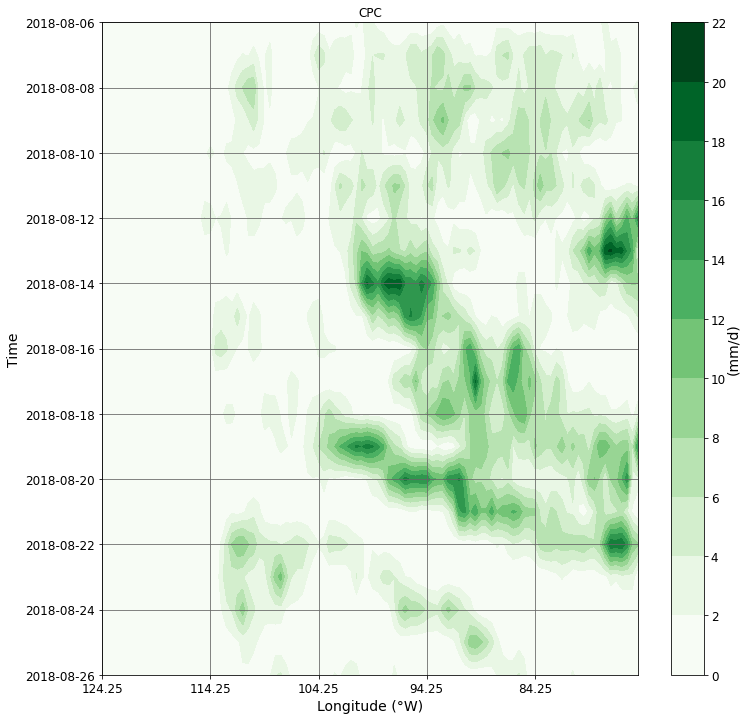

In [44]:


xi = np.arange(0, 100)
yi = np.arange(0, t)
X, Y = np.meshgrid(xi, yi)

vrange = [0,22]
vstep = 2.0

clevs = np.arange(vrange[0], vrange[1]+vstep, vstep)

tickslabels=[0,2,4,6,8,10,12,14,16,18,20,22]

norm=BoundaryNorm(tickslabels, len(tickslabels)-1)

newcolors = np.vstack((plt.cm.YlGn(np.linspace(0, 1, 2))[2:,:], plt.cm.Greens(np.linspace(0, 1, 11))))

palette = ListedColormap(newcolors, name='test')

fig, ax = plt.subplots(figsize=(12, 12))

cs = plt.contourf(X, Y, prcpCpcConusNoNegYrsLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd],norm = norm, cmap=palette,levels=tickslabels, )

plt.gca().yaxis.set_major_formatter(plt.FixedFormatter(yMD))

plt.gca().set_yticks(timeTicks)
plt.gca().set_yticklabels(timeTickLebels, minor=False)
plt.gca().invert_yaxis()

plt.gca().set_xticklabels(lonTickLebelsBufferStr, minor=False)
plt.title('CPC')
plt.xlabel('Longitude (°W)')

plt.ylabel('Time')
 
cbar = plt.colorbar(ticks=tickslabels, spacing='proportional', extend='both') 

cbar.set_label('(mm/d)',size=14,rotation=90,labelpad=0.15)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.show()

<ipython-input-45-4be1df8d9d39>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().yaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-45-4be1df8d9d39>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(lonTickLebelsBufferStr, minor=False)
<ipython-input-45-4be1df8d9d39>:29: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(ticks=tickslabels, spacing='proportional', extend='both')


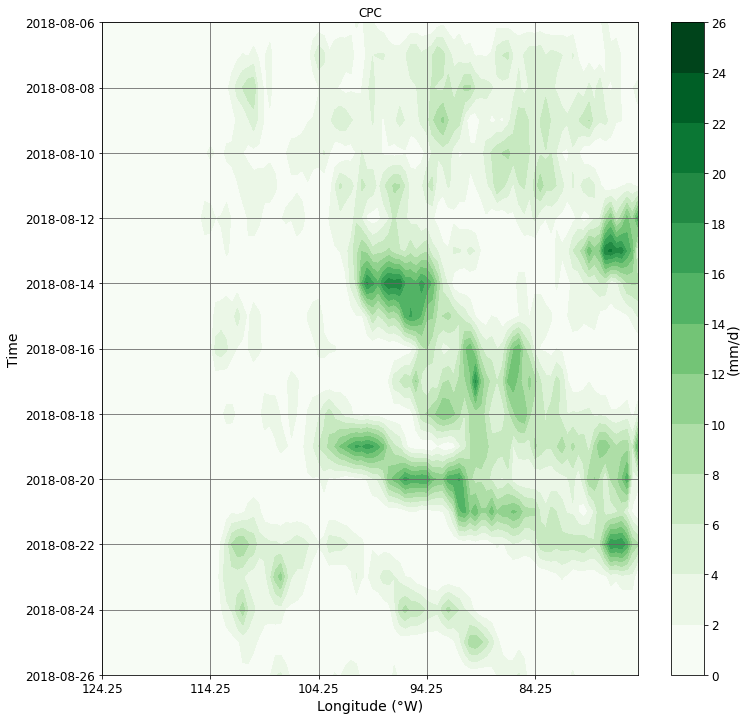

In [45]:

xi = np.arange(0, 100)
yi = np.arange(0, t)
X, Y = np.meshgrid(xi, yi)

vrange = [0,26]
vstep = 2.0
clevs = np.arange(vrange[0], vrange[1]+vstep, vstep)

tickslabels=[0,2,4,6,8,10,12,14,16,18,20,22,24,26]
norm=BoundaryNorm(tickslabels, len(tickslabels)-1)
newcolors = np.vstack((plt.cm.YlGn(np.linspace(0, 1, 2))[2:,:], plt.cm.Greens(np.linspace(0, 1, 13))))
palette = ListedColormap(newcolors, name='test')

fig, ax = plt.subplots(figsize=(12, 12))

cs = plt.contourf(X, Y, prcpCpcConusNoNegYrsLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd],norm = norm, cmap=palette,levels=tickslabels, )

plt.gca().yaxis.set_major_formatter(plt.FixedFormatter(yMD))

plt.gca().set_yticks(timeTicks)
plt.gca().set_yticklabels(timeTickLebels, minor=False)
plt.gca().invert_yaxis()

plt.gca().set_xticklabels(lonTickLebelsBufferStr, minor=False)
plt.title('CPC')
plt.xlabel('Longitude (°W)')
plt.ylabel('Time')
 
cbar = plt.colorbar(ticks=tickslabels, spacing='proportional', extend='both') 
cbar.set_label('(mm/d)',size=14,rotation=90,labelpad=0.15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

In [46]:
print(latsConus.shape)
print(latsConusLower.shape)


(72,)
(21,)


## Extract ECMWF precip data (Lead-One) for three weeks in loop starting from 2018/01/01

In [47]:
#   C:/rezaul/1.academic/1.research/1.data/ecmwf/wkInit/wkAccum/fcst/2016/20161226/precipFcst.grib
yrFcstSt = 2018   # USER Input = keep it
yrFcstEnd = 2018   # USER Input = keep it

monFcstSt = 8   # July 30 IC = USER Input  = keep it
monFcstEnd = 8   # Forecast for Aug 6 through Aug 26 = USER Input  = keep it

dayFcstStart = 6   # Aug 6 = USER Input = Forecast for Aug 6 through 26, 2018 = keep it as it is  

yrFcstStStr = str(yrFcstSt)
print(yrFcstStStr)

yrFcstEndStr = str(yrFcstEnd)
print(yrFcstEndStr)

2018
2018


In [48]:

monInitLeadOne = 8   # July 30 IC = USER Input  = keep it
dayInitLeadOne = 6   # July 30 IC = USER Input = Forecast for Aug 6 through 26, 2018 = keep it as it is   (THIS is NEW compared to 1 wk lead time version)

dayFcstLeadOneStartStr = str(yrFcstSt) + str(monInitLeadOne).zfill(2) + str(dayInitLeadOne).zfill(2)
print(dayFcstLeadOneStartStr)


20180806


In [49]:
datesLeadOne = xr.cftime_range(start= dayFcstLeadOneStartStr,freq='7D',periods=weeksTot).strftime('%Y-%m-%d').to_list()   # Targetting May~Sep
print(datesLeadOne)

datesLeadOneStr = xr.cftime_range(start= dayFcstLeadOneStartStr,freq='7D',periods=weeksTot).strftime('%Y%m%d').to_list()   # Targetting May~Sep
print(datesLeadOneStr)

['2018-08-06', '2018-08-13', '2018-08-20']
['20180806', '20180813', '20180820']


In [50]:

yr = yrFcstSt - 1                          # = 2017
wkCount = -1 
msgTot  = -1

for yrID in range(1):
    
    weeksPerYr = weekNumber[yrID]    
    yr = yr + 1                            # = 2018                  
    yrStr = str(yr)     
    print(yrStr)
    
    
    for wk in range(weeksTot):            
        wkCount = wkCount + 1           
        wklyInitDate = datesLeadOneStr[wkCount]       
                
        filePath = r'C:/rezaul/1.academic/1.research/1.data/ecmwf/wkInit/dayAccum/fcst/'+yrStr+'/'+ wklyInitDate
        PATH = os.path.join(filePath)
        fileToJoin = 'precipFcst.grib'
        file = str(filePath) + '/' + str(fileToJoin)
        print(file)  
        
        dataset = gdal.Open(file, gdal.GA_ReadOnly)
        message_count = dataset.RasterCount
        print(message_count)
        
        
        for msg in range(2, message_count+1):
            
            msgTot = msgTot + 1
            
            precipStep = dataset.GetRasterBand(msg)
            precipArrayStep = precipStep.ReadAsArray()
            
            precipRef = dataset.GetRasterBand(msg-1)
            precipArrayRef = precipRef.ReadAsArray()            
            
            precipArrayPosNeg = precipArrayStep - precipArrayRef
            
            if msgTot == 0:
                precipEcmwfConusDaysLeadOne = np.where(precipArrayPosNeg<0,0,precipArrayPosNeg)
                
            else:
                precipEcmwfConusDaysLeadOneToCat = np.where(precipArrayPosNeg<0,0,precipArrayPosNeg)
                
                precipEcmwfConusDaysLeadOne = np.dstack((precipEcmwfConusDaysLeadOne, precipEcmwfConusDaysLeadOneToCat))                
            
           
            
print(precipEcmwfConusDaysLeadOne.shape)      


2018
C:/rezaul/1.academic/1.research/1.data/ecmwf/wkInit/dayAccum/fcst/2018/20180806/precipFcst.grib
8
C:/rezaul/1.academic/1.research/1.data/ecmwf/wkInit/dayAccum/fcst/2018/20180813/precipFcst.grib
8
C:/rezaul/1.academic/1.research/1.data/ecmwf/wkInit/dayAccum/fcst/2018/20180820/precipFcst.grib
8
(72, 142, 21)


## Modifying the ECMWF files (Lead 1) in a loop with the help of the sample CPC modified file

In [51]:
print(precipEcmwfConusDaysLeadOne.shape)
print(precipCpcConusReprToNan.shape)

(72, 142, 21)
(72, 142)


In [52]:
precipEcmwfConusDaysLeadOneToMod = precipEcmwfConusDaysLeadOne.copy()
print(precipEcmwfConusDaysLeadOneToMod.shape)

(72, 142, 21)


In [53]:
t

21

In [54]:
for step in range(t):  
    
    precipEcmwfConusDayLeadOneToMod = precipEcmwfConusDaysLeadOneToMod[:,:, step]
    precipEcmwfConusDayLeadOneToMod[np.isnan(precipCpcConusReprToNan)] = precipCpcConusReprToNan[np.isnan(precipCpcConusReprToNan)]
    
    if step == 0:    
        precipEcmwfConusDaysLeadOneMod = precipEcmwfConusDayLeadOneToMod
        
    else:
        precipEcmwfConusDaysLeadOneModToCat = precipEcmwfConusDayLeadOneToMod
        
        precipEcmwfConusDaysLeadOneMod = np.ma.dstack((precipEcmwfConusDaysLeadOneMod,precipEcmwfConusDaysLeadOneModToCat))
        
        
print(precipEcmwfConusDaysLeadOneMod.shape)        
                

(72, 142, 21)


In [55]:
precipEcmwfConusDaysLeadOneModRepr = precipEcmwfConusDaysLeadOneMod[:,:,timeStepArbitrary]
print(precipEcmwfConusDaysLeadOneModRepr.shape)

(72, 142)


In [56]:
nanCountPrecipEcmwfConusDaysLeadOneModRepr = np.count_nonzero(np.isnan(precipEcmwfConusDaysLeadOneModRepr))
print(nanCountPrecipEcmwfConusDaysLeadOneModRepr)

3794


## Subsetting the ECMWF modified files (Lead- One) over the lower CONUS (30~40 deg Lat), Compressing the masked cells, and then Averaging 

In [57]:
print(precipEcmwfConusDaysLeadOneMod.shape)

(72, 142, 21)


In [58]:
precipEcmwfConusLowerDaysLeadOneMod = precipEcmwfConusDaysLeadOneMod[latConusLowerSt-1:latConusLowerEnd,:,:]
print(precipEcmwfConusLowerDaysLeadOneMod.shape)

(21, 142, 21)


In [59]:
print(x)
print(t)

142
21


In [60]:
precipEcmwfConusLowerDaysLeadOneModLatAvg = np.zeros((t, x))
#precipEcmwfConusLowerDaysModLatAvg = np.zeros((t-2, x))

print(precipEcmwfConusLowerDaysLeadOneModLatAvg.shape)

(21, 142)


In [61]:

for step in range(t):   
    
    precipEcmwfConusLowerDateLeadOneMod = precipEcmwfConusLowerDaysLeadOneMod[:,:, step]
        
    for lonVal in range(x):
        precipEcmwfConusLowerDateLeadOneLatMod = precipEcmwfConusLowerDateLeadOneMod[:,lonVal]
                
        precipEcmwfConusLowerDateLeadOneLatModCompressed = np.ma.compressed(precipEcmwfConusLowerDateLeadOneLatMod)
        
        meanVal = np.nanmean(precipEcmwfConusLowerDateLeadOneLatModCompressed)
        
        precipEcmwfConusLowerDaysLeadOneModLatAvg[step,lonVal] = meanVal
        
        
print(precipEcmwfConusLowerDaysLeadOneModLatAvg.shape)  

(21, 142)


<ipython-input-61-cc9cd749bdad>:10: RuntimeWarning: Mean of empty slice
  meanVal = np.nanmean(precipEcmwfConusLowerDateLeadOneLatModCompressed)


## Hovmoller Plot for ECMWF masked data (Lead One) for three weeks of 2018

<ipython-input-62-60bdb5143222>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().yaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-62-60bdb5143222>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(lonTickLebelsBufferStr, minor=False)
<ipython-input-62-60bdb5143222>:27: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(ticks=tickslabels, spacing='proportional', extend='both')


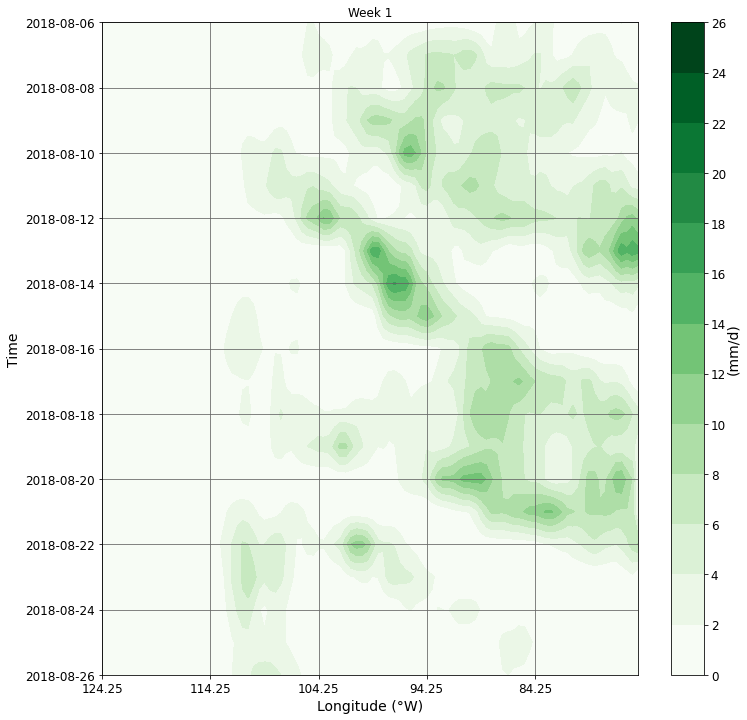

In [62]:

xi = np.arange(0, 100)
yi = np.arange(0, t)
X, Y = np.meshgrid(xi, yi)

vrange = [0,26]
vstep = 2.0
clevs = np.arange(vrange[0], vrange[1]+vstep, vstep)
tickslabels=[0,2,4,6,8,10,12,14,16,18,20,22,24,26]
norm=BoundaryNorm(tickslabels, len(tickslabels)-1)
newcolors = np.vstack((plt.cm.YlGn(np.linspace(0, 1, 2))[2:,:], plt.cm.Greens(np.linspace(0, 1, 13))))
palette = ListedColormap(newcolors, name='test')

fig, ax = plt.subplots(figsize=(12, 12))

cs = plt.contourf(X, Y, precipEcmwfConusLowerDaysLeadOneModLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd],norm = norm, cmap=palette,levels=tickslabels, )

plt.gca().yaxis.set_major_formatter(plt.FixedFormatter(yMD))

plt.gca().set_yticks(timeTicks)
plt.gca().set_yticklabels(timeTickLebels, minor=False)
plt.gca().invert_yaxis()

plt.gca().set_xticklabels(lonTickLebelsBufferStr, minor=False)
plt.title('Week 1')
plt.xlabel('Longitude (°W)')
plt.ylabel('Time') 
cbar = plt.colorbar(ticks=tickslabels, spacing='proportional', extend='both')
cbar.set_label('(mm/d)',size=14,rotation=90,labelpad=0.15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

## Extract ECMWF precip data (Lead-Two) for three weeks in loop starting from 2018/01/01

In [63]:

monInitLeadTwo = 7   # July 30 IC = USER Input  = keep it
dayInitLeadTwo = 30   # July 30 IC = USER Input = Forecast for Aug 6 through 26, 2018 = keep it as it is   (THIS is NEW compared to 1 wk lead time version)

dayFcstLeadTwoStartStr = str(yrFcstSt) + str(monInitLeadTwo).zfill(2) + str(dayInitLeadTwo).zfill(2)
print(dayFcstLeadTwoStartStr)


20180730


In [64]:
datesLeadTwo = xr.cftime_range(start= dayFcstLeadTwoStartStr,freq='7D',periods=weeksTot).strftime('%Y-%m-%d').to_list()   # Targetting May~Sep
print(datesLeadTwo)

datesLeadTwoStr = xr.cftime_range(start= dayFcstLeadTwoStartStr,freq='7D',periods=weeksTot).strftime('%Y%m%d').to_list()   # Targetting May~Sep
print(datesLeadTwoStr)

['2018-07-30', '2018-08-06', '2018-08-13']
['20180730', '20180806', '20180813']


In [65]:
msgIdLeadTwoSt = 9
msgIdLeadTwoEnd = 15
msgDaysLeadTwo = msgIdLeadTwoEnd - msgIdLeadTwoSt + 1
print(msgDaysLeadTwo)

7


In [66]:

yr = yrFcstSt - 1                          # = 2017
wkCount = -1 
msgTot  = -1

for yrID in range(1):    
    weeksPerYr = weekNumber[yrID]    
    yr = yr + 1                            # = 2018                  
    yrStr = str(yr)     
    print(yrStr)    
    
    for wk in range(weeksTot):            
        wkCount = wkCount + 1           
        wklyInitDate = datesLeadTwoStr[wkCount]  
                
        filePath = r'C:/rezaul/1.academic/1.research/1.data/ecmwf/wkInit/dayAccum/fcst/twoWksLead/'+yrStr+'/'+ wklyInitDate
        
        PATH = os.path.join(filePath)
        fileToJoin = 'precipFcst.grib'
        file = str(filePath) + '/' + str(fileToJoin)
        print(file)  
        
        dataset = gdal.Open(file, gdal.GA_ReadOnly)
        message_count = dataset.RasterCount
        print(message_count)       
        
        
        for msg in range(msgIdLeadTwoSt, msgIdLeadTwoEnd+1):          
            
            msgTot = msgTot + 1            
            precipStep = dataset.GetRasterBand(msg)
            precipArrayStep = precipStep.ReadAsArray()
            
            precipRef = dataset.GetRasterBand(msg-1)
            precipArrayRef = precipRef.ReadAsArray()            
            
            precipArrayPosNeg = precipArrayStep - precipArrayRef
            
            if msgTot == 0:
                precipEcmwfConusDaysLeadTwo = np.where(precipArrayPosNeg<0,0,precipArrayPosNeg)
                
            else:
                precipEcmwfConusDaysLeadTwoToCat = np.where(precipArrayPosNeg<0,0,precipArrayPosNeg)
                
                precipEcmwfConusDaysLeadTwo = np.dstack((precipEcmwfConusDaysLeadTwo, precipEcmwfConusDaysLeadTwoToCat))                
            
           
            
print(precipEcmwfConusDaysLeadTwo.shape)    

2018
C:/rezaul/1.academic/1.research/1.data/ecmwf/wkInit/dayAccum/fcst/twoWksLead/2018/20180730/precipFcst.grib
16
C:/rezaul/1.academic/1.research/1.data/ecmwf/wkInit/dayAccum/fcst/twoWksLead/2018/20180806/precipFcst.grib
16
C:/rezaul/1.academic/1.research/1.data/ecmwf/wkInit/dayAccum/fcst/twoWksLead/2018/20180813/precipFcst.grib
16
(72, 142, 21)


## Modifying the ECMWF files (Lead 2) in a loop with the help of the sample CPC modified file

In [67]:
print(precipEcmwfConusDaysLeadTwo.shape)
print(precipCpcConusReprToNan.shape)

(72, 142, 21)
(72, 142)


In [68]:
precipEcmwfConusDaysLeadTwoToMod = precipEcmwfConusDaysLeadTwo.copy()
print(precipEcmwfConusDaysLeadTwoToMod.shape)

(72, 142, 21)


In [69]:
t

21

In [70]:
for step in range(t):
   
    
    precipEcmwfConusDayLeadTwoToMod = precipEcmwfConusDaysLeadTwoToMod[:,:, step]
    precipEcmwfConusDayLeadTwoToMod[np.isnan(precipCpcConusReprToNan)] = precipCpcConusReprToNan[np.isnan(precipCpcConusReprToNan)]
    
    if step == 0:    
        precipEcmwfConusDaysLeadTwoMod = precipEcmwfConusDayLeadTwoToMod
        
    else:
        precipEcmwfConusDaysLeadTwoModToCat = precipEcmwfConusDayLeadTwoToMod
        
        precipEcmwfConusDaysLeadTwoMod = np.ma.dstack((precipEcmwfConusDaysLeadTwoMod,precipEcmwfConusDaysLeadTwoModToCat))
        
        
print(precipEcmwfConusDaysLeadTwoMod.shape)    

(72, 142, 21)


In [71]:
precipEcmwfConusDaysLeadTwoModRepr = precipEcmwfConusDaysLeadTwoMod[:,:,timeStepArbitrary]
print(precipEcmwfConusDaysLeadTwoModRepr.shape)

(72, 142)


In [72]:
nanCountPrecipEcmwfConusDaysLeadTwoModRepr = np.count_nonzero(np.isnan(precipEcmwfConusDaysLeadTwoModRepr))
print(nanCountPrecipEcmwfConusDaysLeadTwoModRepr)

3794


## Subsetting the ECMWF modified files (Lead- Two) over the lower CONUS (30~40 deg Lat), Compressing the masked cells, and then Averaging 

In [73]:
print(precipEcmwfConusDaysLeadTwoMod.shape)

(72, 142, 21)


In [74]:
precipEcmwfConusLowerDaysLeadTwoMod = precipEcmwfConusDaysLeadTwoMod[latConusLowerSt-1:latConusLowerEnd,:,:]
print(precipEcmwfConusLowerDaysLeadTwoMod.shape)

(21, 142, 21)


In [75]:
print(x)
print(t)

142
21


In [76]:
precipEcmwfConusLowerDaysLeadTwoModLatAvg = np.zeros((t, x))
#precipEcmwfConusLowerDaysLeadTwoModLatAvg = np.zeros((t-2, x))

print(precipEcmwfConusLowerDaysLeadTwoModLatAvg.shape)

(21, 142)


In [77]:

for step in range(t):

    
    precipEcmwfConusLowerDateLeadTwoMod = precipEcmwfConusLowerDaysLeadTwoMod[:,:, step]
    
    for lonVal in range(x):
        precipEcmwfConusLowerDateLeadTwoLatMod = precipEcmwfConusLowerDateLeadTwoMod[:,lonVal]
                
        precipEcmwfConusLowerDateLeadTwoLatModCompressed = np.ma.compressed(precipEcmwfConusLowerDateLeadTwoLatMod)
        
        meanVal = np.nanmean(precipEcmwfConusLowerDateLeadTwoLatModCompressed)
        
        precipEcmwfConusLowerDaysLeadTwoModLatAvg[step,lonVal] = meanVal
        
        
print(precipEcmwfConusLowerDaysLeadTwoModLatAvg.shape)  

(21, 142)


<ipython-input-77-6ce0d8fd8dd3>:11: RuntimeWarning: Mean of empty slice
  meanVal = np.nanmean(precipEcmwfConusLowerDateLeadTwoLatModCompressed)


## Hovmoller Plot for ECMWF masked data (Lead Two) for three weeks of 2018

<ipython-input-78-90bdf2f65611>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().yaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-78-90bdf2f65611>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(lonTickLebelsBufferStr, minor=False)
<ipython-input-78-90bdf2f65611>:25: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(ticks=tickslabels, spacing='proportional', extend='both')


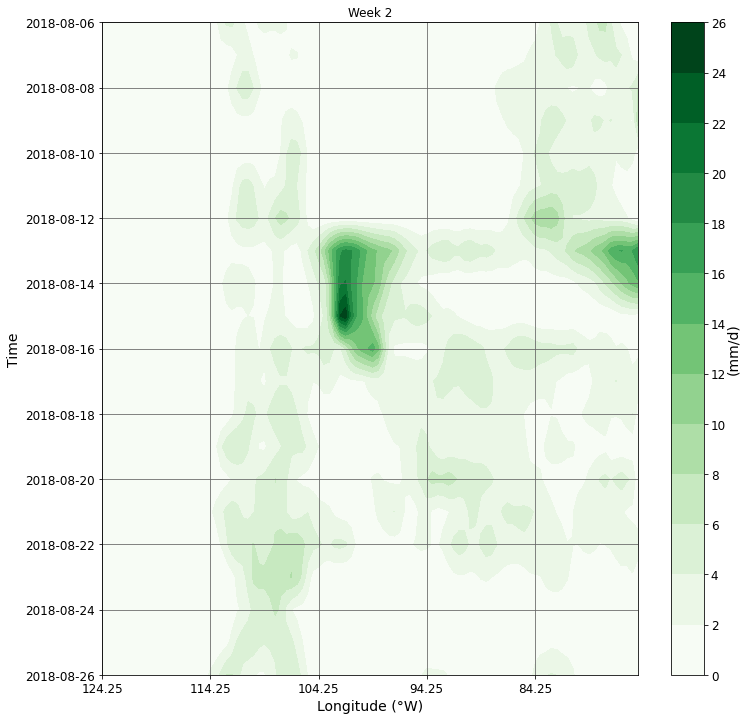

In [78]:


xi = np.arange(0, 100)
yi = np.arange(0, t)
X, Y = np.meshgrid(xi, yi)

vrange = [0,26]
vstep = 2.0
clevs = np.arange(vrange[0], vrange[1]+vstep, vstep)
tickslabels=[0,2,4,6,8,10,12,14,16,18,20,22,24,26]
norm=BoundaryNorm(tickslabels, len(tickslabels)-1)
newcolors = np.vstack((plt.cm.YlGn(np.linspace(0, 1, 2))[2:,:], plt.cm.Greens(np.linspace(0, 1, 13))))
palette = ListedColormap(newcolors, name='test')

fig, ax = plt.subplots(figsize=(12, 12))

cs = plt.contourf(X, Y, precipEcmwfConusLowerDaysLeadTwoModLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd],norm = norm, cmap=palette,levels=tickslabels, )

plt.gca().yaxis.set_major_formatter(plt.FixedFormatter(yMD))
plt.gca().set_yticks(timeTicks)
plt.gca().set_yticklabels(timeTickLebels, minor=False)
plt.gca().invert_yaxis()
plt.gca().set_xticklabels(lonTickLebelsBufferStr, minor=False)
plt.title('Week 2')
plt.xlabel('Longitude (°W)')
plt.ylabel('Time')
cbar = plt.colorbar(ticks=tickslabels, spacing='proportional', extend='both') 
cbar.set_label('(mm/d)',size=14,rotation=90,labelpad=0.15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

## Extract ECMWF precip data (Lead-Three) for three weeks in loop starting from 2018/01/01

In [79]:

monInitLeadThree = 7   # July 30 IC = USER Input  = keep it
dayInitLeadThree = 23   # July 30 IC = USER Input = Forecast for Aug 6 through 26, 2018 = keep it as it is   (THIS is NEW compared to 1 wk lead time version)

dayFcstLeadThreeStartStr = str(yrFcstSt) + str(monInitLeadThree).zfill(2) + str(dayInitLeadThree).zfill(2)
print(dayFcstLeadThreeStartStr)


20180723


In [80]:
datesLeadThree = xr.cftime_range(start= dayFcstLeadThreeStartStr,freq='7D',periods=weeksTot).strftime('%Y-%m-%d').to_list()   # Targetting May~Sep
print(datesLeadThree)

datesLeadThreeStr = xr.cftime_range(start= dayFcstLeadThreeStartStr,freq='7D',periods=weeksTot).strftime('%Y%m%d').to_list()   # Targetting May~Sep
print(datesLeadThreeStr)

['2018-07-23', '2018-07-30', '2018-08-06']
['20180723', '20180730', '20180806']


In [81]:
msgIdLeadThreeSt = 16
msgIdLeadThreeEnd = 22
msgDaysLeadThree = msgIdLeadThreeEnd - msgIdLeadThreeSt + 1
print(msgDaysLeadThree)

7


In [82]:

yr = yrFcstSt - 1                          # = 2017
wkCount = -1 
msgTot  = -1
for yrID in range(1):    
    weeksPerYr = weekNumber[yrID]    
    yr = yr + 1                            # = 2018                  
    yrStr = str(yr)     
    print(yrStr)
    
    
    for wk in range(weeksTot):            
        wkCount = wkCount + 1           
        wklyInitDate = datesLeadThreeStr[wkCount]            
        
        filePath = r'C:/rezaul/1.academic/1.research/1.data/ecmwf/wkInit/dayAccum/fcst/threeWksLead/'+yrStr+'/'+ wklyInitDate
        
        PATH = os.path.join(filePath)
        fileToJoin = 'precipFcst.grib'
        file = str(filePath) + '/' + str(fileToJoin)
        print(file)  
        
        dataset = gdal.Open(file, gdal.GA_ReadOnly)
        message_count = dataset.RasterCount
        print(message_count)        
        
        for msg in range(msgIdLeadThreeSt, msgIdLeadThreeEnd+1):
            
            
            msgTot = msgTot + 1            
            precipStep = dataset.GetRasterBand(msg)
            precipArrayStep = precipStep.ReadAsArray()            
            precipRef = dataset.GetRasterBand(msg-1)
            precipArrayRef = precipRef.ReadAsArray()           
            
            precipArrayPosNeg = precipArrayStep - precipArrayRef
            
            if msgTot == 0:
                precipEcmwfConusDaysLeadThree = np.where(precipArrayPosNeg<0,0,precipArrayPosNeg)
                
            else:
                precipEcmwfConusDaysLeadThreeToCat = np.where(precipArrayPosNeg<0,0,precipArrayPosNeg)
                
                precipEcmwfConusDaysLeadThree = np.dstack((precipEcmwfConusDaysLeadThree, precipEcmwfConusDaysLeadThreeToCat))                
            
           
            
print(precipEcmwfConusDaysLeadThree.shape) 

2018
C:/rezaul/1.academic/1.research/1.data/ecmwf/wkInit/dayAccum/fcst/threeWksLead/2018/20180723/precipFcst.grib
23
C:/rezaul/1.academic/1.research/1.data/ecmwf/wkInit/dayAccum/fcst/threeWksLead/2018/20180730/precipFcst.grib
23
C:/rezaul/1.academic/1.research/1.data/ecmwf/wkInit/dayAccum/fcst/threeWksLead/2018/20180806/precipFcst.grib
23
(72, 142, 21)


## Modifying the ECMWF files (Lead 3) in a loop with the help of the sample CPC modified file

In [83]:
print(precipEcmwfConusDaysLeadThree.shape)
print(precipCpcConusReprToNan.shape)

(72, 142, 21)
(72, 142)


In [84]:
precipEcmwfConusDaysLeadThreeToMod = precipEcmwfConusDaysLeadThree.copy()
print(precipEcmwfConusDaysLeadThreeToMod.shape)

(72, 142, 21)


In [85]:
t

21

In [86]:
for step in range(t):  
    
    precipEcmwfConusDayLeadThreeToMod = precipEcmwfConusDaysLeadThreeToMod[:,:, step]
    precipEcmwfConusDayLeadThreeToMod[np.isnan(precipCpcConusReprToNan)] = precipCpcConusReprToNan[np.isnan(precipCpcConusReprToNan)]
    
    if step == 0:    
        precipEcmwfConusDaysLeadThreeMod = precipEcmwfConusDayLeadThreeToMod
        
    else:
        precipEcmwfConusDaysLeadThreeModToCat = precipEcmwfConusDayLeadThreeToMod
        
        precipEcmwfConusDaysLeadThreeMod = np.ma.dstack((precipEcmwfConusDaysLeadThreeMod,precipEcmwfConusDaysLeadThreeModToCat))
        
        
print(precipEcmwfConusDaysLeadThreeMod.shape)    

(72, 142, 21)


In [87]:
precipEcmwfConusDaysLeadThreeModRepr = precipEcmwfConusDaysLeadThreeMod[:,:,timeStepArbitrary]
print(precipEcmwfConusDaysLeadThreeModRepr.shape)

(72, 142)


In [88]:
nanCountPrecipEcmwfConusDaysLeadThreeModRepr = np.count_nonzero(np.isnan(precipEcmwfConusDaysLeadThreeModRepr))
print(nanCountPrecipEcmwfConusDaysLeadThreeModRepr)

3794


## Subsetting the ECMWF modified files (Lead- Three) over the lower CONUS (30~40 deg Lat), Compressing the masked cells, and then Averaging 

In [89]:
print(precipEcmwfConusDaysLeadThreeMod.shape)

(72, 142, 21)


In [90]:
precipEcmwfConusLowerDaysLeadThreeMod = precipEcmwfConusDaysLeadThreeMod[latConusLowerSt-1:latConusLowerEnd,:,:]
print(precipEcmwfConusLowerDaysLeadThreeMod.shape)

(21, 142, 21)


In [91]:
print(x)
print(t)

142
21


In [92]:
precipEcmwfConusLowerDaysLeadThreeModLatAvg = np.zeros((t, x))
#precipEcmwfConusLowerDaysLeadTwoModLatAvg = np.zeros((t-2, x))

print(precipEcmwfConusLowerDaysLeadThreeModLatAvg.shape)

(21, 142)


In [93]:

for step in range(t): 
    
    precipEcmwfConusLowerDateLeadThreeMod = precipEcmwfConusLowerDaysLeadThreeMod[:,:, step]
        
    for lonVal in range(x):
        precipEcmwfConusLowerDateLeadThreeLatMod = precipEcmwfConusLowerDateLeadThreeMod[:,lonVal]
                
        precipEcmwfConusLowerDateLeadThreeLatModCompressed = np.ma.compressed(precipEcmwfConusLowerDateLeadThreeLatMod)
        
        meanVal = np.nanmean(precipEcmwfConusLowerDateLeadThreeLatModCompressed)
        
        precipEcmwfConusLowerDaysLeadThreeModLatAvg[step,lonVal] = meanVal
        
        
print(precipEcmwfConusLowerDaysLeadThreeModLatAvg.shape)  

(21, 142)


<ipython-input-93-74f3f7dd647f>:10: RuntimeWarning: Mean of empty slice
  meanVal = np.nanmean(precipEcmwfConusLowerDateLeadThreeLatModCompressed)


## Hovmoller Plot for ECMWF masked data (Lead Three) for three weeks of 2018

<ipython-input-94-6334b7f75ebd>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().yaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-94-6334b7f75ebd>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(lonTickLebelsBufferStr, minor=False)
<ipython-input-94-6334b7f75ebd>:28: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(ticks=tickslabels, spacing='proportional', extend='both')


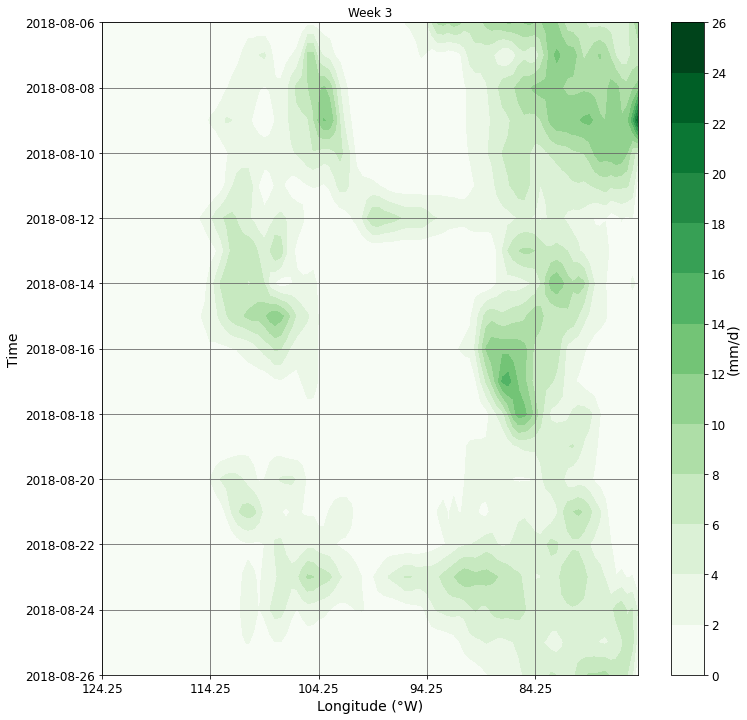

In [94]:


xi = np.arange(0, 100)
yi = np.arange(0, t)
X, Y = np.meshgrid(xi, yi)

vrange = [0,26]
vstep = 2.0
clevs = np.arange(vrange[0], vrange[1]+vstep, vstep)
tickslabels=[0,2,4,6,8,10,12,14,16,18,20,22,24,26]
norm=BoundaryNorm(tickslabels, len(tickslabels)-1)
newcolors = np.vstack((plt.cm.YlGn(np.linspace(0, 1, 2))[2:,:], plt.cm.Greens(np.linspace(0, 1, 13))))
palette = ListedColormap(newcolors, name='test')

fig, ax = plt.subplots(figsize=(12, 12))

cs = plt.contourf(X, Y, precipEcmwfConusLowerDaysLeadThreeModLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd],norm = norm, cmap=palette,levels=tickslabels, )

plt.gca().yaxis.set_major_formatter(plt.FixedFormatter(yMD))

plt.gca().set_yticks(timeTicks)
plt.gca().set_yticklabels(timeTickLebels, minor=False)
plt.gca().invert_yaxis()

plt.gca().set_xticklabels(lonTickLebelsBufferStr, minor=False)
plt.title('Week 3')
plt.xlabel('Longitude (°W)')
plt.ylabel('Time')
 
cbar = plt.colorbar(ticks=tickslabels, spacing='proportional', extend='both') 
cbar.set_label('(mm/d)',size=14,rotation=90,labelpad=0.15)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

plt.show()

## Calculate Marginals

## Marginals for CPC

In [95]:
print(prcpCpcConusNoNegYrsLatAvg.shape)

(21, 142)


In [96]:
print(prcpCpcConusNoNegYrsLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd].shape)

(21, 100)


In [97]:
print(t)
print(x)

21
142


In [98]:
prcpCpcConusNoNegYrsLatAvgSumDays = np.nansum(prcpCpcConusNoNegYrsLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd], axis = 0)
print(prcpCpcConusNoNegYrsLatAvgSumDays.shape)
#print(prcpCpcConusNoNegYrsLatAvgSumDays)

(100,)


In [99]:
lonListBuffer1 = []
lonBufferSt1  = 134.25

for iLon in range(7):    # An artifact of 6, only 5 needed
    #lonList.append(lonSt)
    
    if iLon == 0:
        lonBufferSt1 = 134.25
    else:
        lonBufferSt1 = lonBufferSt1 - 10
        
    lonListBuffer1.append(lonBufferSt1)
    
print(lonListBuffer1)   
lonTickLebelsBufferStr1 = ['134.25','124.25','114.25','104.25','94.25','84.25','74.25']
print(lonTickLebelsBufferStr1)

[134.25, 124.25, 114.25, 104.25, 94.25, 84.25, 74.25]
['134.25', '124.25', '114.25', '104.25', '94.25', '84.25', '74.25']


## Marginals for Lead 1

In [100]:
print(precipEcmwfConusLowerDaysLeadOneModLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd].shape)

(21, 100)


In [101]:

precipEcmwfConusLowerDaysLeadOneModLatAvgSumDays = np.nansum(precipEcmwfConusLowerDaysLeadOneModLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd], axis = 0)
print(precipEcmwfConusLowerDaysLeadOneModLatAvgSumDays.shape)
#print(precipEcmwfConusLowerDaysLeadOneModLatAvgSumDays)
    

(100,)


## Marginals for Lead 2

In [102]:
print(precipEcmwfConusLowerDaysLeadTwoModLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd].shape)

(21, 100)


In [103]:

precipEcmwfConusLowerDaysLeadTwoModLatAvgSumDays = np.nansum(precipEcmwfConusLowerDaysLeadTwoModLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd], axis = 0)
print(precipEcmwfConusLowerDaysLeadTwoModLatAvgSumDays.shape)
#print(precipEcmwfConusLowerDaysLeadTwoModLatAvgSumDays)
    

(100,)


## Marginals for Lead 3

In [104]:
print(precipEcmwfConusLowerDaysLeadThreeModLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd].shape)

(21, 100)


In [105]:

precipEcmwfConusLowerDaysLeadThreeModLatAvgSumDays = np.nansum(precipEcmwfConusLowerDaysLeadThreeModLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd], axis = 0)
print(precipEcmwfConusLowerDaysLeadThreeModLatAvgSumDays.shape)
#print(precipEcmwfConusLowerDaysLeadThreeModLatAvgSumDays)
    

(100,)


## Figures in Panels

In [106]:
xi = np.arange(0, 100)
yi = np.arange(0, t)
X, Y = np.meshgrid(xi, yi)

vrange = [0,26]
vstep = 2.0
clevs = np.arange(vrange[0], vrange[1]+vstep, vstep)
tickslabels=[0,2,4,6,8,10,12,14,16,18,20,22,24,26]
norm=BoundaryNorm(tickslabels, len(tickslabels)-1)
newcolors = np.vstack((plt.cm.YlGn(np.linspace(0, 1, 2))[2:,:], plt.cm.Greens(np.linspace(0, 1, 13))))
palette = ListedColormap(newcolors, name='test')


<ipython-input-107-625a5c2d68c5>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.yaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-107-625a5c2d68c5>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(lonTickLebelsBufferStr, minor=False)
<ipython-input-107-625a5c2d68c5>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.yaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-107-625a5c2d68c5>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(lonTickLebelsBufferStr, minor=False)
<ipython-input-107-625a5c2d68c5>:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.yaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-107-625a5c2d68c5>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(lonTickLebelsBuff

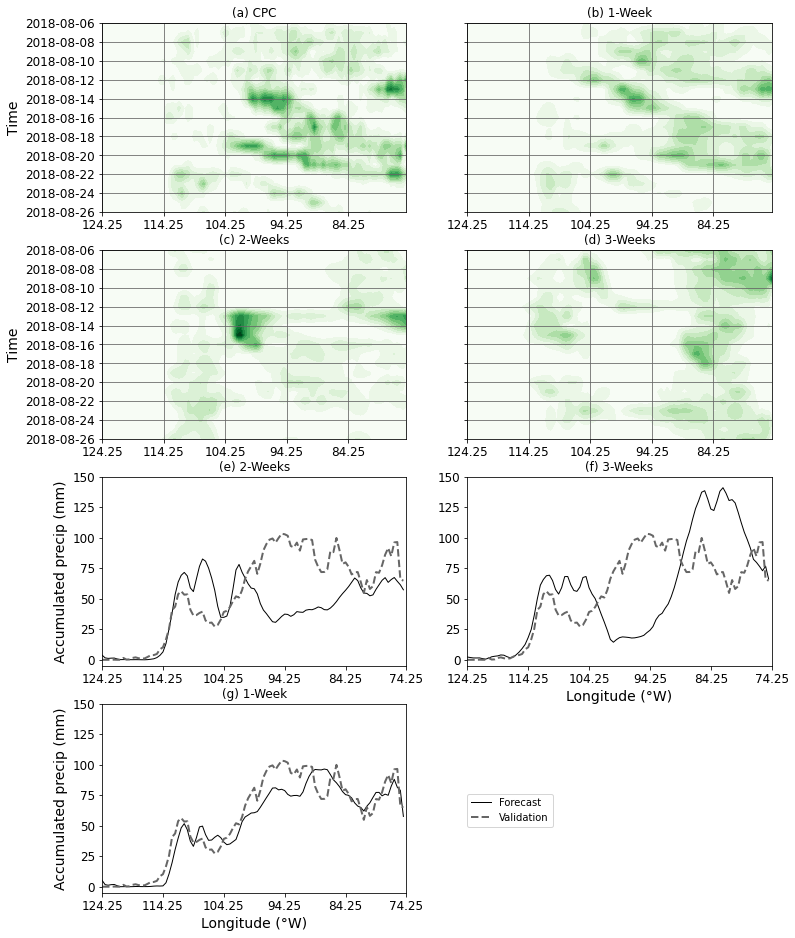

In [107]:
import matplotlib.gridspec as gridspec
fontSize = 12
textFontVal = 12

fig = plt.figure(constrained_layout=False, figsize=(12, 16))

gs = gridspec.GridSpec(4, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, 0])
#+++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++

cs1 = ax1.contourf(X, Y, prcpCpcConusNoNegYrsLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd],norm = norm, cmap=palette,levels=tickslabels, )
ax1.yaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax1.set_yticks(timeTicks)
ax1.set_yticklabels(timeTickLebels, minor=False)
ax1.invert_yaxis()

ax1.set_xticklabels(lonTickLebelsBufferStr, minor=False)
ax1.set_title('(a) CPC')
#ax1.set_xlabel('Longitude (°W)')
ax1.set_ylabel('Time')

ax1.grid(b=True, which='major', color='#666666', linestyle='-')


#+++++++++++++++++++++++++++++++

cs2 = ax2.contourf(X, Y, precipEcmwfConusLowerDaysLeadOneModLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd],norm = norm, cmap=palette,levels=tickslabels, )
ax2.yaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax2.set_yticks(timeTicks)
#ax2.set_yticklabels(timeTickLebels, minor=False)
ax2.set_yticklabels([], minor=False)

ax2.invert_yaxis()

ax2.set_xticklabels(lonTickLebelsBufferStr, minor=False)
ax2.set_title('(b) 1-Week')
#ax2.set_xlabel('Longitude (°W)')
#ax2.set_ylabel('Time')

ax2.grid(b=True, which='major', color='#666666', linestyle='-')


#+++++++++++++++++++++++++++++++

cs3 = ax3.contourf(X, Y, precipEcmwfConusLowerDaysLeadTwoModLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd],norm = norm, cmap=palette,levels=tickslabels, )
ax3.yaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax3.set_yticks(timeTicks)
ax3.set_yticklabels(timeTickLebels, minor=False)
ax3.invert_yaxis()

ax3.set_xticklabels(lonTickLebelsBufferStr, minor=False)
ax3.set_title('(c) 2-Weeks')
#ax3.set_xlabel('Longitude (°W)')
ax3.set_ylabel('Time')

ax3.grid(b=True, which='major', color='#666666', linestyle='-')
#+++++++++++++++++++++++++++++++

cs4 = ax4.contourf(X, Y, precipEcmwfConusLowerDaysLeadThreeModLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd],norm = norm, cmap=palette,levels=tickslabels, )
ax4.yaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax4.set_yticks(timeTicks)
#ax4.set_yticklabels(timeTickLebels, minor=False)
ax4.set_yticklabels([], minor=False)

ax4.invert_yaxis()

ax4.set_xticklabels(lonTickLebelsBufferStr, minor=False)
ax4.set_title('(d) 3-Weeks')
#ax4.set_xlabel('Longitude (°W)')
#ax4.set_ylabel('Time')

ax4.grid(b=True, which='major', color='#666666', linestyle='-')

#+++++++++++++++++++++++++++++++


ax5.plot( range(100),precipEcmwfConusLowerDaysLeadTwoModLatAvgSumDays, marker='', color='k',  linewidth=1, label='Forecast')
ax5.plot( range(100),prcpCpcConusNoNegYrsLatAvgSumDays, marker='', linestyle = '--', color='#666666',  linewidth=2, label='Validation')
#ax5.set_xlabel('Longitude (°W)')
ax5.set_ylabel('Accumulated precip (mm)')
ax5.set_title('(e) 2-Weeks')

ax5.set_xticklabels(lonTickLebelsBufferStr, minor=False)
ax5.set_xlim([0,100])
ax5.set_ylim([-5,150])

#+++++++++++++++++++++++++++++++


ax6.plot( range(100),precipEcmwfConusLowerDaysLeadThreeModLatAvgSumDays, marker='', color='k',  linewidth=1, label='Forecast')
ax6.plot( range(100),prcpCpcConusNoNegYrsLatAvgSumDays, marker='', linestyle = '--', color='#666666',  linewidth=2, label='Validation')
ax6.set_xlabel('Longitude (°W)')
#ax6.set_ylabel('Accumulated precip (mm)')
ax6.set_title('(f) 3-Weeks')

ax6.set_xticklabels(lonTickLebelsBufferStr, minor=False)
ax6.set_xlim([0,100])
ax6.set_ylim([-5,150])
#+++++++++++++++++++++++++++++++


ax7.plot( range(100),precipEcmwfConusLowerDaysLeadOneModLatAvgSumDays, marker='', color='k',  linewidth=1, label='Forecast')
ax7.plot( range(100),prcpCpcConusNoNegYrsLatAvgSumDays, marker='', linestyle = '--', color='#666666',  linewidth=2,label='Validation')
#ax7.set_xlabel('Longitude (°W)')
ax7.set_ylabel('Accumulated precip (mm)')
ax7.set_title('(g) 1-Week')

ax7.set_xticklabels(lonTickLebelsBufferStr, minor=False)
ax7.set_xlim([0,100])
ax7.set_ylim([-5,150])
ax7.set_xlabel('Longitude (°W)')
#+++++++++++++++++++++++++++++++
ax7.legend(ncol=1, loc=(1.2, 0.35 ))

#+++++++++++++++++++++++++++++++

#cs = plt.contourf(X, Y, precipEcmwfConusLowerDaysLeadTwoModLatAvg[:,lonsConusBufferSt-1:lonsConusBufferEnd],norm = norm, cmap=palette,levels=tickslabels, )
#cbar = ax4.set_colorbar(ticks=tickslabels, spacing='proportional', extend='both') 
#cbar.set_label('(mm/d)',size=14,rotation=90,labelpad=0.15)


#+++++++++++++++++++++++++++++++
plt.show()

In [108]:
STOP here ======================================================

SyntaxError: invalid syntax (<ipython-input-108-8ce31687a02d>, line 1)